In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [5]:
 from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [6]:
df = pd.read_csv('NSE-BSE.csv')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,707.0,707.95,681.0,682.65,683.10,131700.0,910.52
1,2018-09-27,716.8,723.50,691.1,697.80,697.15,156222.0,1104.25
2,2018-09-26,720.0,724.40,709.0,710.00,711.60,71780.0,513.48
3,2018-09-25,725.0,725.00,710.5,715.00,718.15,93181.0,668.03
4,2018-09-24,725.3,728.00,712.0,721.00,721.90,126374.0,911.15


In [12]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2018-09-28,2018-09-28,707.0,707.95,681.0,682.65,683.10,131700.0,910.52
2018-09-27,2018-09-27,716.8,723.50,691.1,697.80,697.15,156222.0,1104.25
2018-09-26,2018-09-26,720.0,724.40,709.0,710.00,711.60,71780.0,513.48
2018-09-25,2018-09-25,725.0,725.00,710.5,715.00,718.15,93181.0,668.03
2018-09-24,2018-09-24,725.3,728.00,712.0,721.00,721.90,126374.0,911.15


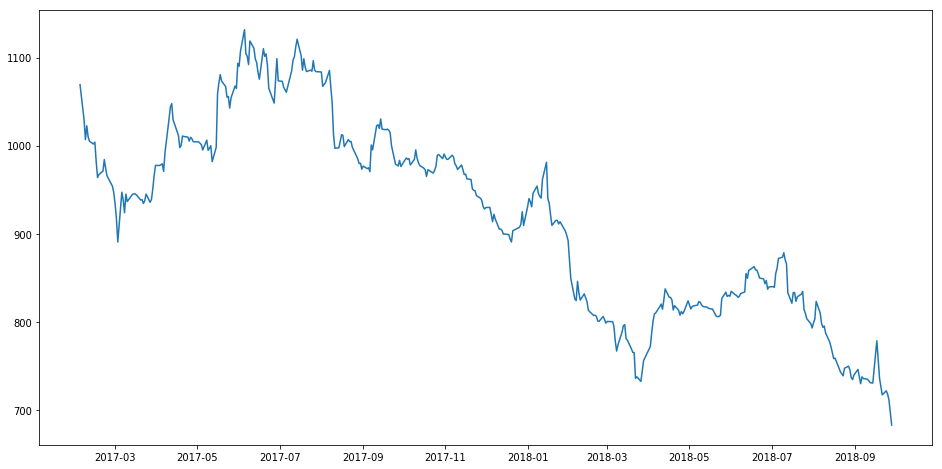

In [13]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'],label='Close Price')

In [23]:
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
new_data.head()
#data.tail()

,Date,Close
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [27]:
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]
new_data.shape

(410, 2)

In [32]:
train = new_data[:328]
valid = new_data[328:]
valid.shape

(82, 2)

In [33]:
preds = []
for i in range(0,82):
    a = train['Close'][len(train)-82+i].sum() + sum(preds)
    b = a/248
    preds.append(b)

In [34]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
rms

796.1332427012765

/home/enigma/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/enigma/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


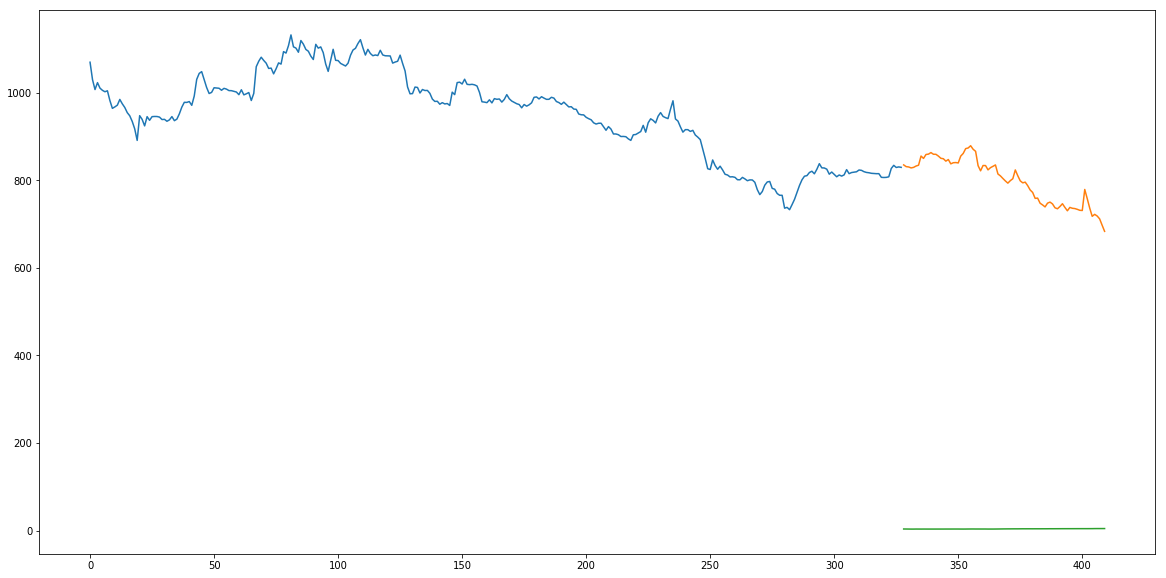

In [38]:
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])